Epoch 1
-------------------------------
loss: 2.318043  [   64/60000]
loss: 2.296032  [ 6464/60000]
loss: 2.273104  [12864/60000]
loss: 2.260480  [19264/60000]
loss: 2.250279  [25664/60000]
loss: 2.222898  [32064/60000]
loss: 2.224988  [38464/60000]
loss: 2.191201  [44864/60000]
loss: 2.189856  [51264/60000]
loss: 2.139148  [57664/60000]
Test Error: 
 Accuracy: 43.2%, Avg loss: 2.146087 

Epoch 2
-------------------------------
loss: 2.165633  [   64/60000]
loss: 2.148734  [ 6464/60000]
loss: 2.082197  [12864/60000]
loss: 2.097553  [19264/60000]
loss: 2.054367  [25664/60000]
loss: 1.988147  [32064/60000]
loss: 2.014181  [38464/60000]
loss: 1.928431  [44864/60000]
loss: 1.938940  [51264/60000]
loss: 1.849306  [57664/60000]
Test Error: 
 Accuracy: 58.5%, Avg loss: 1.857765 

Epoch 3
-------------------------------
loss: 1.899216  [   64/60000]
loss: 1.861138  [ 6464/60000]
loss: 1.734639  [12864/60000]
loss: 1.779004  [19264/60000]
loss: 1.683758  [25664/60000]
loss: 1.623954  [32064/600

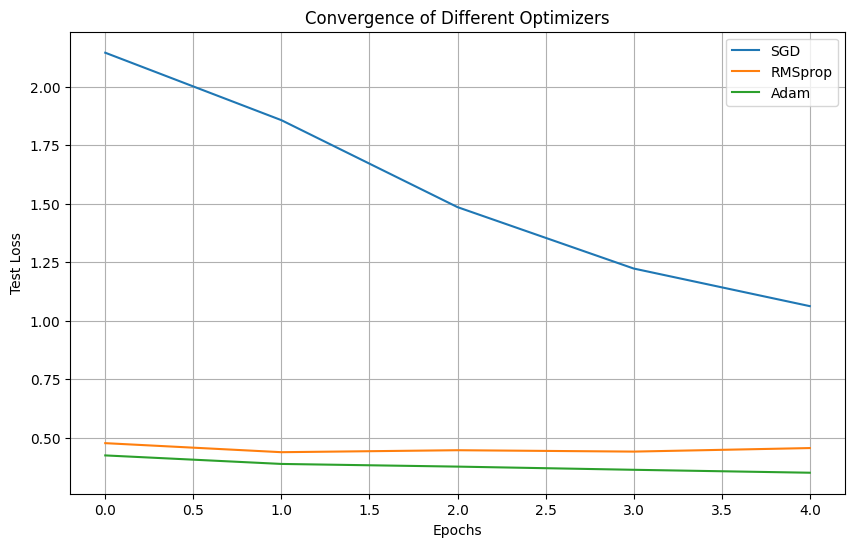

'\n1. SGD (Stochastic Gradient Descent) -- это алгоритм оптимизации,\nкоторый обновляет веса модели в направлении, \nпротивоположном градиенту функции потерь. \nОн прост в реализации, но может быть медленным в сходимости и чувствительным к выбору скорости обучения.\nНапример при скорости обучения 1e-2 он значительно быстрее сокращает функцию потерь, чем при 1e-3.\n\n2. RMSprop (Root Mean Square Propagation) -- это алгоритм оптимизации,\nкоторый использует экспоненциально взвешенное среднее квадратов градиентов для адаптации скорости обучения для каждого параметра. \nОн помогает справиться с проблемами, связанными с выбором скорости обучения, и улучшает скорость сходимости. \nСтоит заметить, что он значительно стабильнее SGD.\n\n3. Adam (Adaptive Moment Estimation) -- это алгоритм оптимизации,\nкоторый комбинирует преимущества SGD, RMSprop.\nОн использует как среднее значение градиентов, так и среднее значение квадратов градиентов,\nчтобы адаптировать скорость обучения для каждого парам

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    sum_loss = 0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        sum_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss

def run_training(epochs, train_dataloader, model, loss_fn, optimizer):
    test_loss = []
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train_loop(train_dataloader, model, loss_fn, optimizer)

        acc, avg_loss = test_loop(test_dataloader, model, loss_fn)
        test_loss.append(avg_loss)
    print("Done!")
    
    return test_loss

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
batch_size = 64
epochs = 5

model = NeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
test_loss_sgd = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

model = NeuralNetwork()
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate, alpha=0.9)
test_loss_rms = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

model = NeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
test_loss_adam = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

plt.figure(figsize=(10, 6))
plt.plot(test_loss_sgd, label='SGD')
plt.plot(test_loss_rms, label='RMSprop')
plt.plot(test_loss_adam, label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Convergence of Different Optimizers')
plt.legend()
plt.grid(True)
plt.show()

'''
1. SGD (Stochastic Gradient Descent) -- это алгоритм оптимизации,
который обновляет веса модели в направлении, 
противоположном градиенту функции потерь. 
Он прост в реализации, но может быть медленным в сходимости и чувствительным к выбору скорости обучения.
Например при скорости обучения 1e-2 он значительно быстрее сокращает функцию потерь, чем при 1e-3.

2. RMSprop (Root Mean Square Propagation) -- это алгоритм оптимизации,
который использует экспоненциально взвешенное среднее квадратов градиентов для адаптации скорости обучения для каждого параметра. 
Он помогает справиться с проблемами, связанными с выбором скорости обучения, и улучшает скорость сходимости. 
Стоит заметить, что он значительно стабильнее SGD.

3. Adam (Adaptive Moment Estimation) -- это алгоритм оптимизации,
который комбинирует преимущества SGD, RMSprop.
Он использует как среднее значение градиентов, так и среднее значение квадратов градиентов,
чтобы адаптировать скорость обучения для каждого параметра.
Adam обычно является самым быстрым алгоритмом сходимости, ноболее чувствительный гиперпараметрам.
Скорость уменьшения ошибки значительно выше, но зависин от параметра скорости обучения.
'''